### PLEASE STORE ALL UPLOADED SCRIPTS IN THE SAME FOLDER

In [1]:
import copy
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Imported in the cell below are some custom python modules<br>
Module "helper_utils.py" contains all custom functions deployed in various modules<br>
Module "phase2_daily_summary.py" contains all data transformation operations 
to produce the "TransformedData/axi_dataset_transformed_daily.csv" aggregate data
<br><b>
    NOTE: "phase2_data_cleaning.py" is deployed in "phase2_daily_summary.py" module - for source data cleaning
    </b>

In [2]:
from helper_utils import HelperUtils as hu
import phase2_daily_summary as ph2_ds
# place all scripts in the same folder

In [3]:
# clean source data (axi_trades) using a custom Python data cleaning script
fdr_path = "/Users/osagieaib/Library/CloudStorage/OneDrive-GodsVisionEnterprise/Documents/Workspace/IT Career/Cedarstone"
file_name = "axi_trades.xlsx"
acct_selected = 4728846
# acct_selected = 6686814
ph2_ds.run_app(parent_folder_path=fdr_path, 
               file_name=file_name,
               acct_nr=acct_selected)

{'axi_trades.xlsx': '/Users/osagieaib/Library/CloudStorage/OneDrive-GodsVisionEnterprise/Documents/Workspace/IT Career/Cedarstone/axi_trades.xlsx'}


SOURCE FILE NOT AVAILABLE
DATA CLEANING ABORTED!


DAILY SUMMARY CUBE DEVELOPMENT FINISH!



In [4]:
# configure display settings for pandas output
hu.configure_display_settings()

# extract cleaned data from csv file
# you can change root_path value to the folder containing the custom scripts
root_path = "/Users/osagieaib/Library/CloudStorage/OneDrive-GodsVisionEnterprise/Documents/Workspace/IT Career/Cedarstone"
sep = "/"
read_fdr = "TransformedData"
dest_path = sep.join([root_path, read_fdr])
filenames_dict = hu.get_full_path(dest_path, ['csv'])
# print(filenames_dict)

sample_fname = "axi_dataset_transformed_daily.csv"
src_df = pd.read_csv(filenames_dict[sample_fname])
# print(src_df.info())
# print(src_df.head())
# print(src_df.tail())
df = copy.deepcopy(src_df)
filenames_dict.pop(sample_fname)
excl_file = 'axi_dataset_transformed_daily_main.csv'
daily_return_fpath = filenames_dict.pop(excl_file)
# print(filenames_dict)
joined_df = hu.join_to_sample_df(df,
                                 filenames_dict)
# print(joined_df.info())
# print(joined_df.head())

df = copy.deepcopy(joined_df)

# extract daily return df
daily_return_df = pd.read_csv(daily_return_fpath)
df2 = copy.deepcopy(daily_return_df)

# recast calendar date column
date_cols = ['calendar_day']
df = hu.recast_dtypes(df,
                      date_cols=date_cols)
print(df.info())
print(df.head())
print(df.tail())

df2 = hu.recast_dtypes(df2,
                      date_cols=date_cols)
print(df2.info())


Reading axi_dataset_transformed_short

Reading axi_dataset_transformed_long
calendar_day's DATATYPE CHANGED!
date columns assigned

COLUMN DATA TYPE RECAST COMPLETE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 98 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   calendar_day                  11 non-null     datetime64[ns]
 1   date_key                      11 non-null     int64         
 2   day_name                      11 non-null     object        
 3   symbol                        11 non-null     object        
 4   trades_opened                 11 non-null     int64         
 5   trades_closed                 11 non-null     int64         
 6   trades_ongoing                11 non-null     float64       
 7   trades_won                    11 non-null     float64       
 8   trades_lost                   11 non-null     float64       
 9  

In [5]:
# COMPUTE CORE KPIs & RATIOs
# start and end dates
col_list = ['calendar_day',
            'date_key',
            'trades_opened']
cond = (df[col_list[-1]]>0)
start_date = datetime.datetime.date(df.loc[cond, col_list[:-1]].min()[col_list[0]])
end_date = datetime.datetime.date(df.loc[cond, col_list[:-1]].max()[col_list[0]])

# total trades (i.e tickets count)
closed_trades = df['trades_closed'].sum()
ongoing_trades = df['trades_ongoing'].sum()
n_trades = df['trades_opened'].sum()
lots_traded = df2['traded_lots'].sum()
pips_gained = df2['pips_gained'].sum()

# max amount won
col_list = ['calendar_day',
            'symbol',
            'max_profit',
            'max_loss']
cond = (df[col_list[2]] == df[col_list[2]].max())
max_profit = round(df.loc[cond, col_list[2]].values[0], 2)
max_profit_date = df.loc[cond, col_list[0]].dt.date.values[0]
max_profit_symbol = df.loc[cond, col_list[1]].values[0].upper()
# max amount lost
cond = (df[col_list[-1]] == df[col_list[-1]].min().round(2))
max_loss = round(df.loc[cond, col_list[-1]].values[0], 2)
max_loss_date = df.loc[cond, col_list[0]].dt.date.values[0]
max_loss_symbol = df.loc[cond, col_list[1]].values[0].upper()

# win = profit yielding trade
# win rate(%) = wins/total (i.e winning tickets/total trades)
n_wins = df['trades_won'].sum()
n_longs = df['longs_closed'].sum()
n_shorts = df['shorts_closed'].sum()
longs_won = df['longs_won'].sum()
shorts_won = df['shorts_won'].sum()

# win rates
win_rate = round((n_wins / closed_trades) * 100, 0)
long_win_rate = round((longs_won / n_longs) * 100, 2)
short_win_rate = round((shorts_won / n_shorts) * 100, 2)

# amount won
amount_won = round(df['amount_won'].sum(), 2)
long_amount_won = round(df['long_amount_won'].sum(), 2)
short_amount_won = round(df['short_amount_won'].sum(), 2)

# percentage won
long_perc_amount_won = round((long_amount_won / amount_won) * 100, 2)
short_perc_amount_won = round((short_amount_won / amount_won) * 100, 2)

# losses
n_losses = df['trades_lost'].sum()
longs_lost = df['longs_lost'].sum()
shorts_lost = df['shorts_lost'].sum()

# loss rates
loss_rate = round((n_losses / closed_trades) * 100, 0)
long_loss_rate = round((longs_lost / n_longs) * 100, 2)
short_loss_rate = round((shorts_lost / n_shorts) * 100, 2)

# amount lost
amount_lost = round(df['amount_lost'].sum(), 2)
long_amount_lost = round(df['long_amount_lost'].sum(), 2)
short_amount_lost = round(df['short_amount_lost'].sum(), 2)

# percentage lost
long_perc_amount_lost = round((long_amount_lost / amount_lost) * 100, 2)
short_perc_amount_lost = round((short_amount_lost / amount_lost) * 100, 2)

# neutrals
n_neutrals = df['trades_neutral'].sum()
neutral_rate = round((n_neutrals/closed_trades) * 100, 0)

# average win vs average loss (avg = sum/count)
# average win = sum(profit)/number of winning tickets
pips_won = df['pips_won'].sum()
avg_win_profit = round(amount_won/n_wins, 2)
# avg_win_profit = round(total_net_profit / closed_trades, 2)
avg_win_pips = round(pips_won/n_wins, 2)
# avg_win_pips = round(total_win_pips / closed_trades, 2)

# average loss = sum(loss)/number of losing tickets
pips_lost = df['pips_lost'].sum()
avg_net_loss = round(amount_lost/n_losses, 2)
# avg_net_loss = round(total_net_loss / closed_trades, 2)
avg_loss_pips = round(pips_lost/n_losses, 2)
# avg_loss_pips = round(total_loss_pips / closed_trades, 2)

# scalping and overnight trade
scalping_trades = df2['trade_scalping'].sum()
overnight_trades = df2['overnight_trade'].sum()
# won
scalping_trades_won = df['trade_scalping_won'].sum()
overnight_trades_won = df['overnight_trade_won'].sum()
# amount
scalping_amount_won = df['scalping_amount_won'].sum()
overnight_amount_won = df['overnight_amount_won'].sum()
scalping_amount_lost = df['scalping_amount_lost'].sum()
overnight_amount_lost = df['overnight_amount_lost'].sum()

# percentage scalping and overnight trade
perc_scalping_trades = round((scalping_trades/n_trades) * 100, 2)
perc_overnight_trades = round((overnight_trades/n_trades) * 100, 2)
perc_scalping_trades_won = round((scalping_trades_won / scalping_trades) * 100, 2)
perc_overnight_trades_won = round((overnight_trades_won / overnight_trades) * 100, 2)
# amount
perc_scalping_amount_won = round((scalping_amount_won / amount_won) * 100, 2)
perc_overnight_amount_won = round((overnight_amount_won / amount_won) * 100, 2)
perc_scalping_amount_lost = round((scalping_amount_lost / amount_lost) * 100, 2)
perc_overnight_amount_lost = round((overnight_amount_lost / amount_lost) * 100, 2)

# maximum drawdown (optional)

# sharpe ratio = (average return/stddev) * sqrt(252)
# average_return = round(df['avg_return'].mean() * 100, 2)
average_return = round(df2['avg_return'].mean() * 100, 2)
# std_return = round(df["std_return"].mean() * 100, 2)
std_return = round(df2["std_return"].mean() * 100, 2)
std_neg_return = round(df2["std_neg_return"].mean() * 100, 2)
# sharpe_ratio = round((average_return/std_return) * np.sqrt(252), 2)
sharpe_ratio = round((average_return / std_return) * np.sqrt(252), 2)

# sortino ratio = (average return/stddev of negative returns) * sqrt(252)
sortino_ratio = round((average_return / std_neg_return) * np.sqrt(252), 2)

# profit factor = total profits/total losses
profit_factor = abs(round((amount_won/amount_lost), 2))

In [6]:
# PRESENTATION
print(f"\nACCCOUNT: {acct_selected}")
print(f"\nSTART DATE: {start_date}"
      f"\nEND DATE: {end_date}"
      f"\nTOTAL TRADES: {n_trades}"
      f"\nOPEN TRADES: {ongoing_trades}"
      f"\nCLOSED TRADES: {closed_trades}"
      #Lots traded and pips gained
      f"\nLOTS TRADED: {lots_traded}"
      f"\nNET PIPS GAINED: {pips_gained}"
      )

# WINS
print(f"\nWIN RATE: {win_rate}% ({n_wins}/{closed_trades})"
      f"\nLONG WIN RATE: {long_win_rate}% ({longs_won}/{n_longs})"
      f"\nSHORT WIN RATE: {short_win_rate}% ({shorts_won}/{n_shorts})"
    
      f"\nAMOUNT WON: £{amount_won}"
      f"\nMAX AMOUNT WON: £{max_profit} ON {max_profit_date} "
      f"DURING {max_profit_symbol} POSITION"
      f"\nLONG AMOUNT WON: £{long_amount_won} ({long_perc_amount_won}%)"
      f"\nSHORT AMOUNT WON: £{short_amount_won} ({short_perc_amount_won}%)")
print(f"\nAVERAGE WIN: £{avg_win_profit}/{avg_win_pips}pips")

# LOSSES
print(f"\nLOSS RATE: {loss_rate}% ({n_losses}/{closed_trades})"
      f"\nLONG LOSS RATE: {long_loss_rate}% ({longs_lost}/{n_longs})"
      f"\nSHORT LOSS RATE: {short_loss_rate}% ({shorts_lost}/{n_longs})"
      
      f"\nAMOUNT LOST: £{abs(amount_lost)}"
      f"\nMAX AMOUNT LOST: £{abs(max_loss)} ON {max_loss_date} "
      f"DURING {max_loss_symbol} POSITION"
      f"\nLONG AMOUNT LOST: £{abs(long_amount_lost)} ({long_perc_amount_lost}%)"
      f"\nSHORT AMOUNT LOST: £{abs(short_amount_lost)} ({short_perc_amount_lost}%)")
print(f"\nAVERAGE LOSS: £{avg_net_loss}/{avg_loss_pips}pips")

# SCALPING VS OVERNIGHT
print(f"\nSCALPING TRADES: {scalping_trades} ({perc_scalping_trades}%)"
      f"\nOVERNIGHT TRADES: {overnight_trades} ({perc_overnight_trades}%)"
      f"\nSCALPING TRADES WON: {scalping_trades_won} ({perc_scalping_trades_won}%)"
      f"\nOVERNIGHT TRADES WON: {overnight_trades_won} ({perc_overnight_trades_won}%)"
      
      f"\nSCALPING AMOUNT WON: £{scalping_amount_won} ({perc_scalping_amount_won}%)"
      f"\nOVERNIGHT AMOUNT WON: £{overnight_amount_won} ({perc_overnight_amount_won}%)"
      f"\nSCALPING AMOUNT LOST: £{scalping_amount_lost} ({perc_scalping_amount_lost}%)"
      f"\nOVERNIGHT AMOUNT LOST: £{overnight_amount_lost} ({perc_overnight_amount_lost}%)"
      )

# NEUTRALS
print(f"\nTOTAL NEUTRALS: {n_neutrals}"
      f"\nNEUTRAL RATE (%): {neutral_rate}")

# RETURNS
print(f"\nAVERAGE RETURN: £{average_return}"
      # f"\nAVERAGE RETURN: £{average_return2}"
      f"\nSTD DEV OF RETURN: £{std_return}"
      # f"\nSTD DEV OF RETURN: £{std_return2}"
      f"\nSTD DEV OF -VE RETURN: £{std_neg_return}"
      # f"\nSHARPE RATIO: {sharpe_ratio2}"
      f"\nSHARPE RATIO: {sharpe_ratio}"
      f"\nSORTINO RATIO: {sortino_ratio}"
      f"\nPROFIT FACTOR (%): {profit_factor}")


ACCCOUNT: 4728846

START DATE: 2025-09-22
END DATE: 2025-09-26
TOTAL TRADES: 339
OPEN TRADES: 1.0
CLOSED TRADES: 338
LOTS TRADED: 3.6499999999999995
NET PIPS GAINED: -310382.6

WIN RATE: 58.0% (195.0/338)
LONG WIN RATE: 56.93% (78.0/137.0)
SHORT WIN RATE: 58.5% (117.0/200.0)
AMOUNT WON: £187.05
MAX AMOUNT WON: £6.32 ON 2025-09-26 DURING XAUUSD POSITION
LONG AMOUNT WON: £79.9 (42.72%)
SHORT AMOUNT WON: £107.15 (57.28%)

AVERAGE WIN: £0.96/12224.27pips

LOSS RATE: 42.0% (143.0/338)
LONG LOSS RATE: 43.8% (60.0/137.0)
SHORT LOSS RATE: 41.5% (83.0/137.0)
AMOUNT LOST: £201.46
MAX AMOUNT LOST: £31.71 ON 2025-09-23 DURING XAUUSD POSITION
LONG AMOUNT LOST: £98.28 (48.78%)
SHORT AMOUNT LOST: £103.18 (51.22%)

AVERAGE LOSS: £-1.41/-17465.15pips

SCALPING TRADES: 199 (58.7%)
OVERNIGHT TRADES: 3 (0.88%)
SCALPING TRADES WON: 120.0 (60.3%)
OVERNIGHT TRADES WON: 0.0 (0.0%)
SCALPING AMOUNT WON: £89.0 (47.58%)
OVERNIGHT AMOUNT WON: £0.0 (0.0%)
SCALPING AMOUNT LOST: £-80.0 (39.71%)
OVERNIGHT AMOUNT LOST

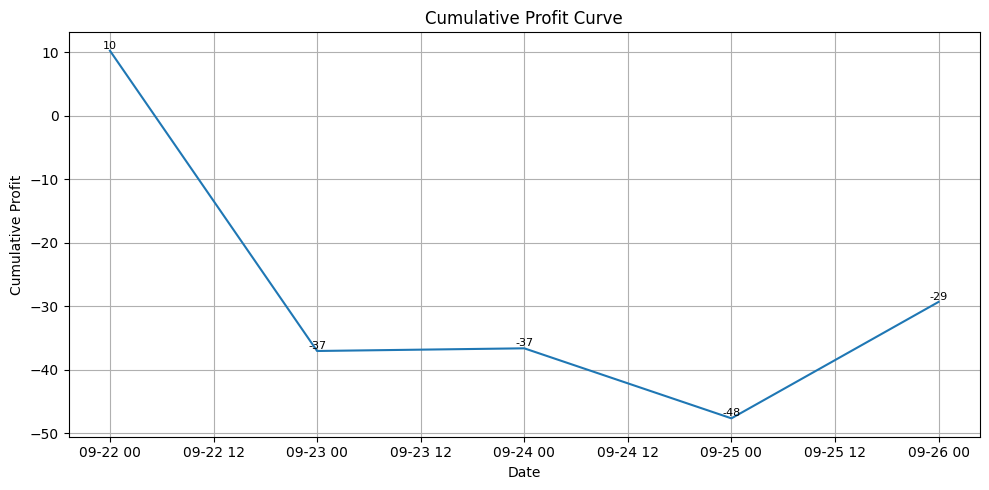

In [7]:
# daily net profit curve
plt.figure(figsize=(10, 5))
plt.plot(df2["calendar_day"], 
         df2["cumulative_profit"])
plt.title("Cumulative Profit Curve")
plt.xlabel("Date")
plt.ylabel("Cumulative Profit")
# Add labels at each point
for x, y in zip(df2["calendar_day"], df2["cumulative_profit"]):
    plt.text(x, y, f"{y:.0f}", ha="center", va="bottom", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

# sns.barplot(data=df2,
#              x='calendar_day',
#              y='avg_return',
#              ax=ax1)
# ax1 = sns.lineplot(data=df2,
#                    x='calendar_day',
#                    y='cumulative_profit')

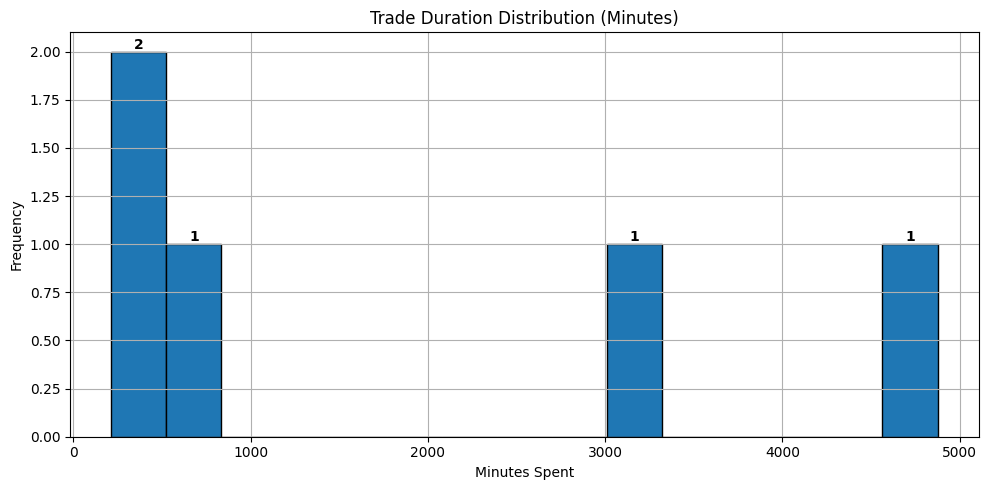

In [8]:
# Trade Duration Histogram
plt.figure(figsize=(10, 5))
counts, bins, patches = plt.hist(df2['minutes_spent'],
                                bins=15,
                                edgecolor='black')
plt.title("Trade Duration Distribution (Minutes)")
plt.ylabel("Frequency")
plt.xlabel("Minutes Spent")
# Add data labels above bars
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    if count > 0:
        x = (bin_left + bin_right) / 2
        y = count
        plt.text(x, y, str(int(count)), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

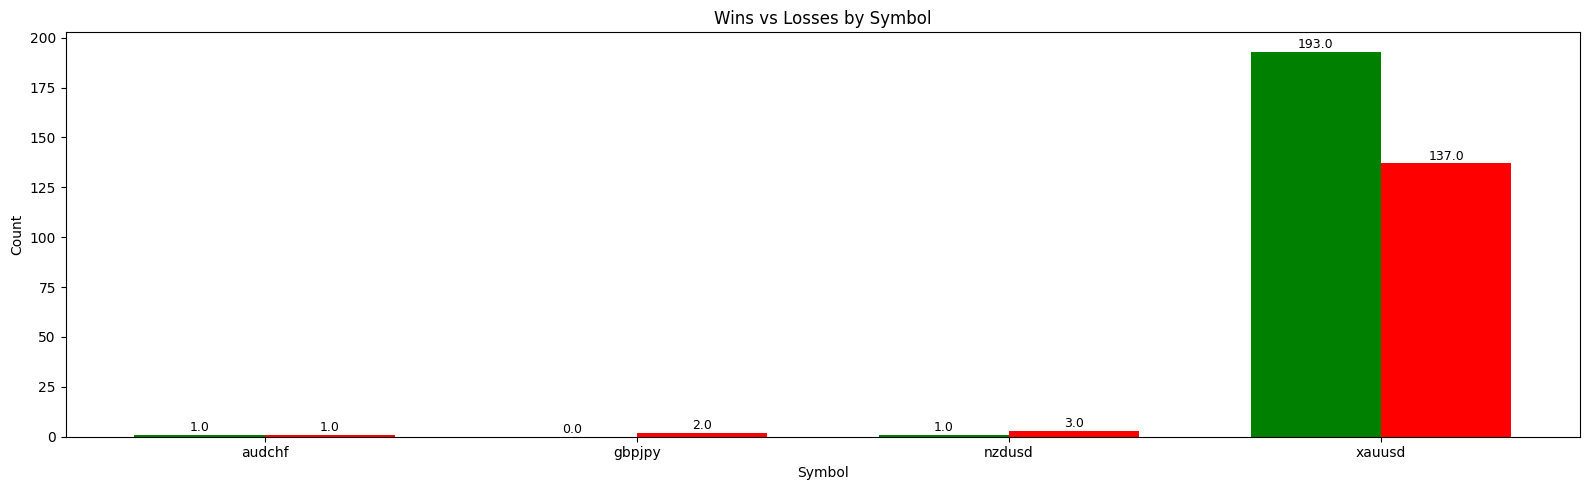

In [9]:
# Wins Vs Losses by Symbol
plt.figure(figsize=(10, 5))

col_list = ["symbol", 
            "trades_won", 
            "trades_lost"]
df3 = df[col_list].groupby(col_list[0]).sum().reset_index()
df3 = df3.loc[df3['symbol'] != '0']
# print(df3)

x = np.arange(len(df3['symbol']))  # symbol positions
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(16, 5))

# Bars
bars1 = ax.bar(x - width/2, df3[col_list[1]], width, label="Wins", color="green")
bars2 = ax.bar(x + width/2, df3[col_list[-1]], width, label="Losses", color="red")

# Data labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height + 0.2, 
        f"{height}", 
        ha="center", va="bottom", fontsize=9
    )

# Formatting
ax.set_ylabel("Count")
ax.set_xlabel("Symbol")
ax.set_title("Wins vs Losses by Symbol")
ax.set_xticks(x)
ax.set_xticklabels(df3[col_list[0]])

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

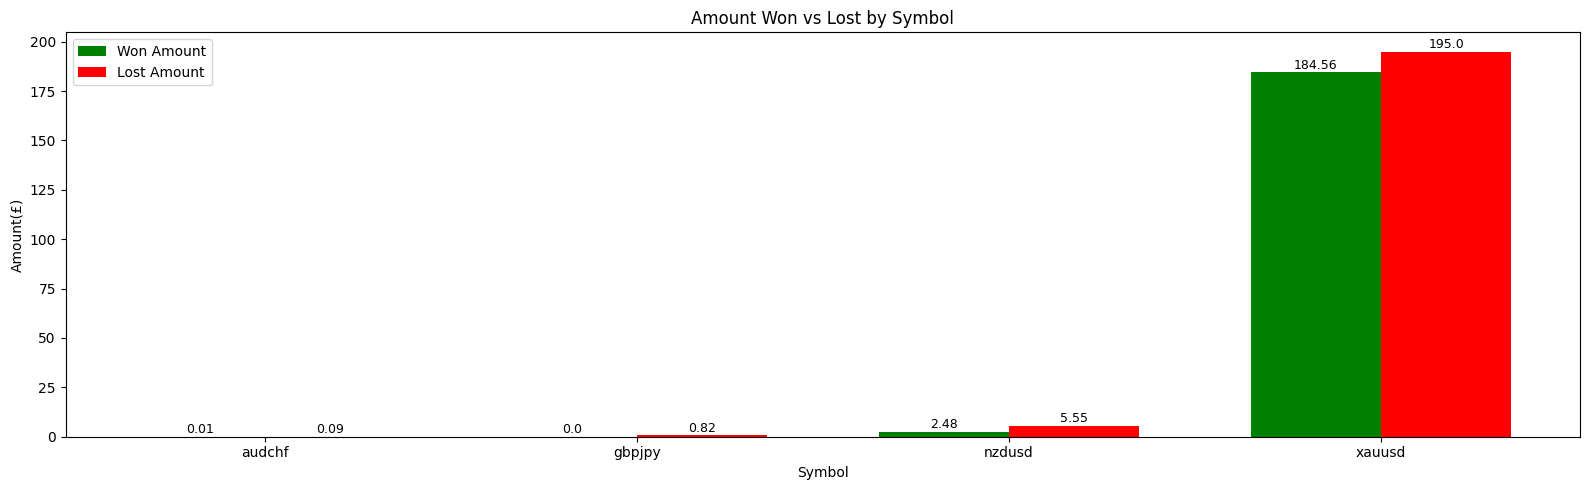

In [10]:
# Amount Won Vs Lost by Symbol

plt.figure(figsize=(10, 5))

col_list = ["symbol", 
            "amount_won", 
            "amount_lost"]
df3 = df[col_list].groupby(col_list[0]).sum().round(2).reset_index()
df3 = df3.loc[df3['symbol'] != '0']
# print(df3)

x = np.arange(len(df3[col_list[0]]))  # symbol positions
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(16, 5))

# Bars
bars1 = ax.bar(x - width/2, df3[col_list[1]], width, label="Won Amount", color="green")
bars2 = ax.bar(x + width/2, df3[col_list[-1]].abs(), width, label="Lost Amount", color="red")

# Data labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height + 0.2, 
        f"{height}", 
        ha="center", va="bottom", fontsize=9
    )

# Formatting
ax.set_ylabel("Amount(£)")
ax.set_xlabel("Symbol")
ax.set_title("Amount Won vs Lost by Symbol")
ax.set_xticks(x)
ax.set_xticklabels(df3[col_list[0]])
ax.legend()

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

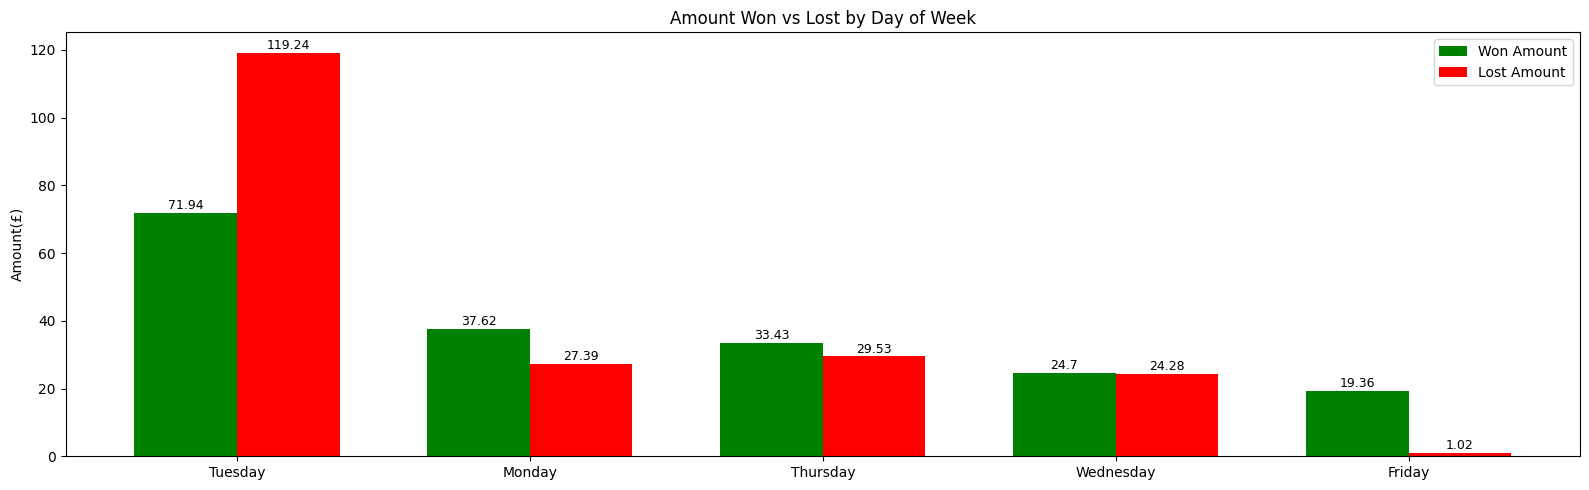

In [19]:
# Amount Won Vs Lost by Symbol

plt.figure(figsize=(10, 5))

col_list = ["day_name", 
            "amount_won", 
            "amount_lost"]
df3 = df[col_list].groupby(col_list[0]).sum().round(2).reset_index().sort_values(['amount_won'],
                                                                                ascending=[False])
df3 = df3.loc[df3['day_name'] != '0']
# print(df3)

x = np.arange(len(df3[col_list[0]]))  # day_name positions
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(16, 5))

# Bars
bars1 = ax.bar(x - width/2, df3[col_list[1]], width, label="Won Amount", color="green")
bars2 = ax.bar(x + width/2, df3[col_list[-1]].abs(), width, label="Lost Amount", color="red")

# Data labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height + 0.2, 
        f"{height}", 
        ha="center", va="bottom", fontsize=9
    )

# Formatting
ax.set_ylabel("Amount(£)")
# ax.set_xlabel("Day")
ax.set_title("Amount Won vs Lost by Day of Week")
ax.set_xticks(x)
ax.set_xticklabels(df3[col_list[0]])
ax.legend()

plt.tight_layout()
plt.show()

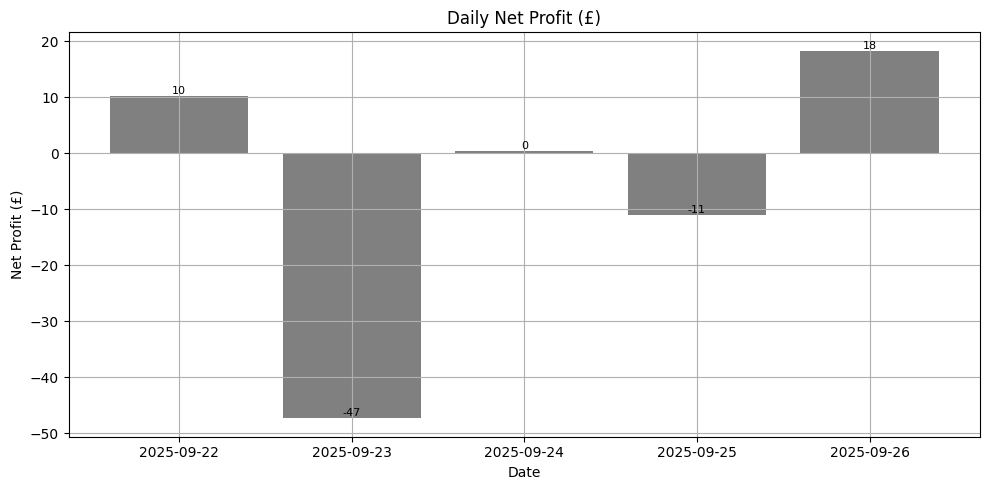

In [12]:
# Daily Profit (using Open Datetime)
plt.figure(figsize=(10, 5))

col_list = ["calendar_day", 
            "net_profit"]
plt.bar(df2[col_list[0]],
        df2[col_list[-1]],
        color=['grey'])
plt.title("Daily Net Profit (£)")
plt.xlabel("Date")
plt.ylabel("Net Profit (£)")
# Add labels at each point
for x, y in zip(df2[col_list[0]], df2[col_list[-1]]):
    plt.text(x, y, f"{y:.0f}", ha="center", va="bottom", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

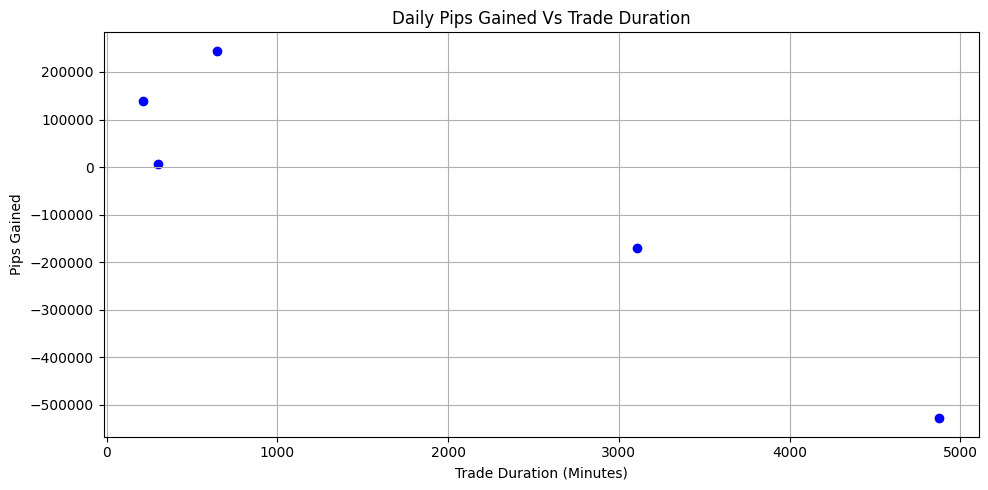

In [13]:
# Daily Pips Gained vs Trade Duration Scatterplot
plt.figure(figsize=(10, 5))

col_list = ["minutes_spent",
            "pips_gained"]
plt.scatter(df2[col_list[0]],
        df2[col_list[-1]],
        color=['blue'])
plt.title("Daily Pips Gained Vs Trade Duration")
plt.xlabel("Trade Duration (Minutes)")
plt.ylabel("Pips Gained")
# Add labels at each point
# for x, y in zip(df2[col_list[0]], df2[col_list[-1]]):
#     plt.text(x, y, f"{y:.0f}", ha="center", va="bottom", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# RISK FLAGGING
read_fdr = "CleansedData"
rfile_name = "axi_dataset_cleaned.csv"
dest_path = sep.join([root_path, read_fdr, rfile_name])
# print(filenames_dict)
src_df = pd.read_csv(dest_path)
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Account Number            883 non-null    int64  
 1   Ticket                    883 non-null    int64  
 2   Open DateTime             883 non-null    object 
 3   Close DateTime            882 non-null    object 
 4   Open Date                 883 non-null    object 
 5   Open Date Key             883 non-null    int64  
 6   Close Date                882 non-null    object 
 7   Close Date Key            882 non-null    float64
 8   Open Time                 883 non-null    object 
 9   Close Time                882 non-null    object 
 10  Type                      883 non-null    object 
 11  Symbol                    883 non-null    object 
 12  Size                      883 non-null    float64
 13  Open Price                883 non-null    float64
 14  Close Pric

In [15]:
# Scalping Trades
scalping_trades = src_df.loc[src_df['Trade Scalping'] == 1]
# print(scalping_trades.info())
scalping_trades

,Account Number,Ticket,Open DateTime,Close DateTime,Open Date,Open Date Key,Close Date,Close Date Key,Open Time,Close Time,Type,Symbol,Size,Open Price,Close Price,Commission,Swap,Profit,SL,TP,Trade Duration (minutes),Pips Gained,Net Profit,Cumulative Profit,Balance,Initial Balance,Return,Trade Closed,Trade Won,SL Triggered,TP Triggered,Trade Scalping,High Drawdown,3 Consecutive Losses,Overnight Trade
17,4728846,44283308,2025-09-22 16:37:53,2025-09-22 16:38:35,2025-09-22,20250922,2025-09-22,20250922.0,16:37:53,16:38:35,sell,xauusd,0.01,3721.26000,3720.04000,0.0,0.0,0.90,3722.92000,3711.28000,1.0,12200.0,0.90,6.70,256.70,255.80,0.0035,1,1,0,0,1,0,0,0
19,4728846,44283330,2025-09-22 16:41:09,2025-09-22 16:41:24,2025-09-22,20250922,2025-09-22,20250922.0,16:41:09,16:41:24,sell,xauusd,0.01,3722.53000,3720.96000,0.0,0.0,1.16,0.00000,0.00000,0.0,15700.0,1.16,6.47,256.47,255.31,0.0045,1,1,0,0,1,0,0,0
20,4728846,44283336,2025-09-22 16:41:51,2025-09-22 16:42:05,2025-09-22,20250922,2025-09-22,20250922.0,16:41:51,16:42:05,sell,xauusd,0.01,3721.60000,3719.99000,0.0,0.0,1.19,0.00000,0.00000,0.0,16100.0,1.19,7.66,257.66,256.47,0.0046,1,1,0,0,1,0,0,0
21,4728846,44283339,2025-09-22 16:42:18,2025-09-22 16:43:09,2025-09-22,20250922,2025-09-22,20250922.0,16:42:18,16:43:09,buy,xauusd,0.01,3719.03000,3716.65000,0.0,0.0,-1.76,3716.65000,3728.38000,1.0,-23800.0,-1.76,5.90,255.90,257.66,-0.0068,1,-1,1,0,1,1,0,0
22,4728846,44283359,2025-09-22 16:44:00,2025-09-22 16:44:45,2025-09-22,20250922,2025-09-22,20250922.0,16:44:00,16:44:45,sell,xauusd,0.01,3718.93000,3717.32000,0.0,0.0,1.19,3720.71000,3709.09000,1.0,16100.0,1.19,7.09,257.09,255.90,0.0047,1,1,0,0,1,0,0,0
23,4728846,44283440,2025-09-22 16:47:59,2025-09-22 16:49:06,2025-09-22,20250922,2025-09-22,20250922.0,16:47:59,16:49:06,buy,xauusd,0.01,3715.43000,3716.78000,0.0,0.0,1.00,3713.43000,3725.49000,1.0,13500.0,1.00,8.09,258.09,257.09,0.0039,1,1,0,0,1,0,0,0
24,4728846,44283490,2025-09-22 16:49:52,2025-09-22 16:51:15,2025-09-22,20250922,2025-09-22,20250922.0,16:49:52,16:51:15,buy,xauusd,0.01,3714.85000,3716.36000,0.0,0.0,1.12,3713.22000,3725.33000,1.0,15100.0,1.12,9.21,259.21,258.09,0.0043,1,1,0,0,1,0,0,0
26,4728846,44283644,2025-09-22 17:02:08,2025-09-22 17:03:06,2025-09-22,20250922,2025-09-22,20250922.0,17:02:08,17:03:06,buy,xauusd,0.01,3720.96000,3718.93000,0.0,0.0,-1.50,3719.04000,3729.83000,1.0,-20300.0,-1.50,6.38,256.38,257.88,-0.0058,1,-1,0,0,1,1,0,0
28,4728846,44283711,2025-09-22 17:07:45,2025-09-22 17:08:25,2025-09-22,20250922,2025-09-22,20250922.0,17:07:45,17:08:25,sell,xauusd,0.01,3720.08000,3722.24000,0.0,0.0,-1.60,3722.24000,3711.13000,1.0,-21600.0,-1.60,5.69,255.69,257.29,-0.0062,1,-1,1,0,1,1,0,0
31,4728846,44283844,2025-09-22 17:22:23,2025-09-22 17:23:12,2025-09-22,20250922,2025-09-22,20250922.0,17:22:23,17:23:12,buy,xauusd,0.01,3720.14000,3718.26000,0.0,0.0,-1.39,3718.26000,3730.52000,1.0,-18800.0,-1.39,3.84,253.84,255.23,-0.0054,1,-1,1,0,1,1,0,0


In [16]:
# High drawdowns
high_drawdowns = src_df.loc[src_df['High Drawdown'] == 1]
# print(high_drawdowns.info())
high_drawdowns

,Account Number,Ticket,Open DateTime,Close DateTime,Open Date,Open Date Key,Close Date,Close Date Key,Open Time,Close Time,Type,Symbol,Size,Open Price,Close Price,Commission,Swap,Profit,SL,TP,Trade Duration (minutes),Pips Gained,Net Profit,Cumulative Profit,Balance,Initial Balance,Return,Trade Closed,Trade Won,SL Triggered,TP Triggered,Trade Scalping,High Drawdown,3 Consecutive Losses,Overnight Trade
2,4728846,44282151,2025-09-22 14:30:13,2025-09-22 14:41:06,2025-09-22,20250922,2025-09-22,20250922.0,14:30:13,14:41:06,buy,xauusd,0.01,3726.81000,3724.41000,0.0,0.00,-1.77,3724.41000,3736.19000,11.0,-24000.0,-1.77,1.33,251.33,253.10,-0.0070,1,-1,1,0,0,1,0,0
3,4728846,44282295,2025-09-22 14:49:06,2025-09-22 14:52:02,2025-09-22,20250922,2025-09-22,20250922.0,14:49:06,14:52:02,sell,xauusd,0.01,3722.49000,3724.46000,0.0,0.00,-1.45,3724.46000,3714.97000,3.0,-19700.0,-1.45,-0.12,249.88,251.33,-0.0058,1,-1,1,0,0,1,0,0
5,4728846,44282379,2025-09-22 15:00:04,2025-09-22 15:06:15,2025-09-22,20250922,2025-09-22,20250922.0,15:00:04,15:06:15,buy,xauusd,0.01,3724.51000,3723.19000,0.0,0.00,-0.98,3723.19000,3735.20000,6.0,-13200.0,-0.98,-0.07,249.93,250.91,-0.0039,1,-1,1,0,0,1,0,0
8,4728846,44282559,2025-09-22 15:21:37,2025-09-22 15:24:22,2025-09-22,20250922,2025-09-22,20250922.0,15:21:37,15:24:22,buy,xauusd,0.01,3716.65000,3714.09000,0.0,0.00,-1.90,3714.34000,3725.89000,3.0,-25600.0,-1.90,2.17,252.17,254.07,-0.0075,1,-1,0,0,0,1,0,0
9,4728846,44282680,2025-09-22 15:29:20,2025-09-22 15:35:04,2025-09-22,20250922,2025-09-22,20250922.0,15:29:20,15:35:04,sell,xauusd,0.01,3715.55000,3717.74000,0.0,0.00,-1.63,3717.74000,3705.85000,6.0,-21900.0,-1.63,0.54,250.54,252.17,-0.0065,1,-1,1,0,0,1,0,0
15,4728846,44283085,2025-09-22 16:09:09,2025-09-22 16:12:42,2025-09-22,20250922,2025-09-22,20250922.0,16:09:09,16:12:42,buy,xauusd,0.01,3723.01000,3721.22000,0.0,0.00,-1.32,3721.22000,3732.75000,4.0,-17900.0,-1.32,4.75,254.75,256.07,-0.0052,1,-1,1,0,0,1,0,0
18,4728846,44283323,2025-09-22 16:39:07,2025-09-22 16:40:56,2025-09-22,20250922,2025-09-22,20250922.0,16:39:07,16:40:56,sell,xauusd,0.01,3721.05000,3722.92000,0.0,0.00,-1.39,3722.92000,3701.65000,2.0,-18700.0,-1.39,5.31,255.31,256.70,-0.0054,1,-1,1,0,0,1,0,0
21,4728846,44283339,2025-09-22 16:42:18,2025-09-22 16:43:09,2025-09-22,20250922,2025-09-22,20250922.0,16:42:18,16:43:09,buy,xauusd,0.01,3719.03000,3716.65000,0.0,0.00,-1.76,3716.65000,3728.38000,1.0,-23800.0,-1.76,5.90,255.90,257.66,-0.0068,1,-1,1,0,1,1,0,0
25,4728846,44283591,2025-09-22 16:57:02,2025-09-22 17:00:27,2025-09-22,20250922,2025-09-22,20250922.0,16:57:02,17:00:27,buy,xauusd,0.01,3722.18000,3720.38000,0.0,0.00,-1.33,3720.54000,3731.46000,3.0,-18000.0,-1.33,7.88,257.88,259.21,-0.0051,1,-1,0,0,0,1,0,0
26,4728846,44283644,2025-09-22 17:02:08,2025-09-22 17:03:06,2025-09-22,20250922,2025-09-22,20250922.0,17:02:08,17:03:06,buy,xauusd,0.01,3720.96000,3718.93000,0.0,0.00,-1.50,3719.04000,3729.83000,1.0,-20300.0,-1.50,6.38,256.38,257.88,-0.0058,1,-1,0,0,1,1,0,0


In [17]:
# 3 Losses in a row
losing_streak = src_df.loc[src_df['3 Consecutive Losses'] == 1]
# print(losing_streak.info())
losing_streak

,Account Number,Ticket,Open DateTime,Close DateTime,Open Date,Open Date Key,Close Date,Close Date Key,Open Time,Close Time,Type,Symbol,Size,Open Price,Close Price,Commission,Swap,Profit,SL,TP,Trade Duration (minutes),Pips Gained,Net Profit,Cumulative Profit,Balance,Initial Balance,Return,Trade Closed,Trade Won,SL Triggered,TP Triggered,Trade Scalping,High Drawdown,3 Consecutive Losses,Overnight Trade
10,4728846,44282762,2025-09-22 15:37:54,2025-09-22 15:45:20,2025-09-22,20250922,2025-09-22,20250922.0,15:37:54,15:45:20,buy,xauusd,0.01,3716.31000,3716.21000,0.0,0.00,-0.07,3714.28000,3724.25000,7.0,-1000.0,-0.07,0.47,250.47,250.54,-0.0003,1,-1,0,0,0,0,1,0
45,4728846,44284272,2025-09-22 18:18:53,2025-09-22 18:21:00,2025-09-22,20250922,2025-09-22,20250922.0,18:18:53,18:21:00,sell,xauusd,0.01,3726.18000,3726.36000,0.0,0.00,-0.14,3727.43000,3716.38000,2.0,-1800.0,-0.14,6.08,256.08,256.22,-0.0005,1,-1,0,0,0,0,1,0
56,4728846,44286619,2025-09-23 04:21:46,2025-09-23 04:22:40,2025-09-23,20250923,2025-09-23,20250923.0,04:21:46,04:22:40,buy,xauusd,0.01,3754.85000,3753.71000,0.0,0.00,-0.85,3753.02000,3763.97000,1.0,-11400.0,-0.85,7.11,247.11,247.96,-0.0034,1,-1,0,0,1,1,1,0
60,4728846,44286645,2025-09-23 04:29:33,2025-09-23 04:31:30,2025-09-23,20250923,2025-09-23,20250923.0,04:29:33,04:31:30,sell,xauusd,0.01,3749.60000,3749.78000,0.0,0.00,-0.14,3751.52000,3739.61000,2.0,-1800.0,-0.14,6.25,246.25,246.39,-0.0006,1,-1,0,0,0,0,1,0
61,4728846,44286654,2025-09-23 04:34:19,2025-09-23 04:37:15,2025-09-23,20250923,2025-09-23,20250923.0,04:34:19,04:37:15,sell,xauusd,0.01,3751.75000,3753.08000,0.0,0.00,-0.98,3753.08000,3741.37000,3.0,-13300.0,-0.98,5.27,245.27,246.25,-0.0040,1,-1,1,0,0,1,1,0
78,4728846,44286870,2025-09-23 05:32:54,2025-09-23 05:33:51,2025-09-23,20250923,2025-09-23,20250923.0,05:32:54,05:33:51,buy,xauusd,0.01,3744.21000,3742.68000,0.0,0.00,-1.13,3742.68000,3754.21000,1.0,-15300.0,-1.13,6.77,246.77,247.90,-0.0046,1,-1,1,0,1,1,1,0
93,4728846,44288276,2025-09-23 10:40:11,2025-09-23 10:42:37,2025-09-23,20250923,2025-09-23,20250923.0,10:40:11,10:42:37,buy,xauusd,0.01,3755.11000,3753.08000,0.0,0.00,-1.50,3753.08000,3764.18000,2.0,-20300.0,-1.50,2.61,242.61,244.11,-0.0061,1,-1,1,0,0,1,1,0
94,4728846,44288298,2025-09-23 10:42:47,2025-09-23 10:44:53,2025-09-23,20250923,2025-09-23,20250923.0,10:42:47,10:44:53,sell,xauusd,0.01,3753.44000,3754.36000,0.0,0.00,-0.68,3755.30000,3743.75000,2.0,-9200.0,-0.68,1.93,241.93,242.61,-0.0028,1,-1,0,0,0,0,1,0
129,4728846,44289297,2025-09-23 12:36:32,2025-09-23 12:37:44,2025-09-23,20250923,2025-09-23,20250923.0,12:36:32,12:37:44,sell,xauusd,0.01,3783.40000,3783.91000,0.0,0.00,-0.38,3784.87000,3773.52000,1.0,-5100.0,-0.38,8.65,248.65,249.03,-0.0015,1,-1,0,0,1,0,1,0
143,4728846,44289443,2025-09-23 13:02:35,2025-09-23 13:03:30,2025-09-23,20250923,2025-09-23,20250923.0,13:02:35,13:03:30,sell,xauusd,0.01,3783.43000,3784.57000,0.0,0.00,-0.84,3785.53000,3773.80000,1.0,-11400.0,-0.84,8.74,248.74,249.58,-0.0034,1,-1,0,0,1,1,1,0


In [18]:
# Overnight Trades
overnight_trades = src_df.loc[src_df['Overnight Trade'] == 1]
# print(overnight_trades.info())
overnight_trades

,Account Number,Ticket,Open DateTime,Close DateTime,Open Date,Open Date Key,Close Date,Close Date Key,Open Time,Close Time,Type,Symbol,Size,Open Price,Close Price,Commission,Swap,Profit,SL,TP,Trade Duration (minutes),Pips Gained,Net Profit,Cumulative Profit,Balance,Initial Balance,Return,Trade Closed,Trade Won,SL Triggered,TP Triggered,Trade Scalping,High Drawdown,3 Consecutive Losses,Overnight Trade
176,4728846,44289953,2025-09-23 15:24:27,2025-09-25 16:24:36,2025-09-23,20250923,2025-09-25,20250925.0,15:24:27,16:24:36,buy,nzdusd,0.01,0.58628,0.57894,0.0,-0.08,-5.48,0.57894,0.60547,2940.0,-73.4,-5.40,-2.30,237.70,243.10,-0.0222,1,-1,1,0,0,1,0,1
195,4728846,44290385,2025-09-23 16:34:08,2025-09-24 18:41:45,2025-09-23,20250923,2025-09-24,20250924.0,16:34:08,18:41:45,buy,xauusd,0.01,3786.04000,3743.41000,0.0,-0.38,-31.71,3743.41000,3786.13000,1568.0,-426300.0,-31.33,-31.26,208.74,240.07,-0.1305,1,-1,1,0,0,1,0,1
317,4728846,44301128,2025-09-25 13:56:31,2025-09-26 11:40:26,2025-09-25,20250925,2025-09-26,20250926.0,13:56:31,11:40:26,buy,xauusd,0.01,3757.07000,3753.21000,0.0,-0.38,-2.89,3669.40000,3755.82000,1304.0,-38600.0,-2.51,-36.89,203.11,205.62,-0.0122,1,-1,0,0,0,1,0,1
623,6686814,44157364,2025-08-22 18:51:22,2025-08-25 02:22:58,2025-08-22,20250822,2025-08-25,20250825.0,18:51:22,02:22:58,sell,xauusd,0.02,3368.15000,3368.01000,0.0,0.39,0.20,3372.68000,3356.70000,3332.0,1400.0,-0.19,-68.03,330.97,331.16,-0.0006,1,-1,0,0,0,0,0,1
648,6686814,44166954,2025-08-26 12:25:01,2025-09-03 17:00:01,2025-08-26,20250826,2025-09-03,20250903.0,12:25:01,17:00:01,sell,audcad,0.01,0.89788,0.90317,0.0,-0.25,-2.86,0.90294,0.88767,11795.0,-52.9,-2.61,-71.30,327.70,330.31,-0.0079,1,-1,0,0,0,1,0,1
669,6686814,44176360,2025-08-27 20:11:16,2025-08-28 12:18:03,2025-08-27,20250827,2025-08-28,20250828.0,20:11:16,12:18:03,sell,nzdusd,0.01,0.58605,0.58700,0.0,0.01,-0.70,0.58700,0.58427,967.0,-9.5,-0.71,-82.15,316.85,317.56,-0.0022,1,-1,1,0,0,0,1,1
678,6686814,44181070,2025-08-28 17:49:33,2025-09-02 19:15:29,2025-08-28,20250828,2025-09-02,20250902.0,17:49:33,19:15:29,sell,nzdusd,0.03,0.58792,0.58641,0.0,0.03,3.38,0.59261,0.57386,7286.0,15.1,3.35,-78.50,320.50,317.15,0.0106,1,1,0,0,0,0,0,1
679,6686814,44181267,2025-08-28 18:17:51,2025-08-29 15:13:57,2025-08-28,20250828,2025-08-29,20250829.0,18:17:51,15:13:57,sell,eurusd,0.02,1.16690,1.16591,0.0,0.08,1.47,1.17036,1.15719,1256.0,9.9,1.39,-77.11,321.89,320.50,0.0043,1,1,0,0,0,0,0,1
689,6686814,44186745,2025-08-29 23:13:46,2025-09-01 01:50:01,2025-08-29,20250829,2025-09-01,20250901.0,23:13:46,01:50:01,sell,xauaud,0.01,5266.44000,5274.16000,0.0,0.11,-3.74,5274.16000,5245.98000,3036.0,-77200.0,-3.85,-86.69,312.31,316.16,-0.0122,1,-1,1,0,0,1,1,1
721,6686814,44190697,2025-09-01 20:25:05,2025-09-02 08:03:46,2025-09-01,20250901,2025-09-02,20250902.0,20:25:05,08:03:46,buy,xauaud,0.01,5307.62000,5345.37000,0.0,-0.47,18.24,0.00000,0.00000,699.0,377500.0,18.71,-80.59,318.41,299.70,0.0624,1,1,0,0,0,0,0,1
